<a href="https://www.kaggle.com/code/muhammadrubymuhammad/creditcardfrauddetection?scriptVersionId=199660855" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

hello guys.
                                                         Credit Card Fraud Detection
Credit card fraud is a significant issue in the financial industry, costing billions of dollars annually. Fraudulent transactions can occur in various forms, such as unauthorized purchases, identity theft, and account takeovers. Detecting these fraudulent activities promptly is crucial to minimize financial losses and protect consumers.

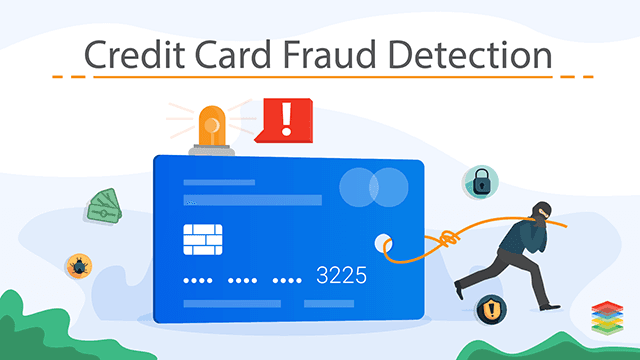

> **now we will make a model to detect if transaction is normal or fraud**

# 1) Import Libraries  

In [1]:
import pandas as pd  # Used for data analysis and manipulation (loading data from CSV, dataframes, etc.)
import numpy as np  # Provides numerical operations and array functionalities
import matplotlib.pyplot as plt  # Used for creating visualizations (plots, charts, etc.)
plt.style.use('ggplot')  # Sets a nice default style for plots using 'ggplot' theme
import seaborn as sns  # Builds on top of matplotlib for creating statistical data visualizations

from sklearn.preprocessing import StandardScaler  # Used to standardize numerical features for machine learning models
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets for model evaluation
from sklearn.linear_model import LogisticRegression  # Implements logistic regression algorithm for classification tasks
from sklearn.ensemble import RandomForestClassifier  # Implements random forest algorithm for classification
from sklearn.tree import DecisionTreeClassifier  # Implements decision tree algorithm for classification
from imblearn.over_sampling import SMOTE # resampling data
import joblib

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Provides various metrics to evaluate model performance
import warnings
warnings.filterwarnings('ignore')  # Suppresses warnings (use with caution, consider addressing the warnings)



# 2) Load and Explore the Dataset


## 1) read data

In [2]:
path = '/kaggle/input/creditcardfraud/creditcard.csv' # you will need to change this debondeing on path o data 
data = pd.read_csv(path)

## 2) Explaor our data

### 1) overview on data

In [3]:
data.head() #will show first 5 column of data 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data .tail() #will show last 5 column of data 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


**note** (if you run this in jupter or Colab notebook )as you can see above some column not appear as a value in display you can solve it using this command :


In [5]:
# remove comment to run this code if you need that
# pd.options.display.max_columns = None # to show all columns in display

In [6]:

data.info() #give us some information about data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe() #show overview about data 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of rows: 284807
Number of columns: 31


### 2) Data cleaning 

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

great, no nulls in data 

In [11]:
data.duplicated().value_counts()

False    283726
True       1081
Name: count, dtype: int64

**Note :**

We have some duplicate data in it, and we're going to drop it now because it's not necessary in our data

In [12]:
data.drop_duplicates(inplace=True) # to drop duplicates 

data.duplicated().value_counts() # test again if any duplicates

False    283726
Name: count, dtype: int64

### 3) Data Visualization

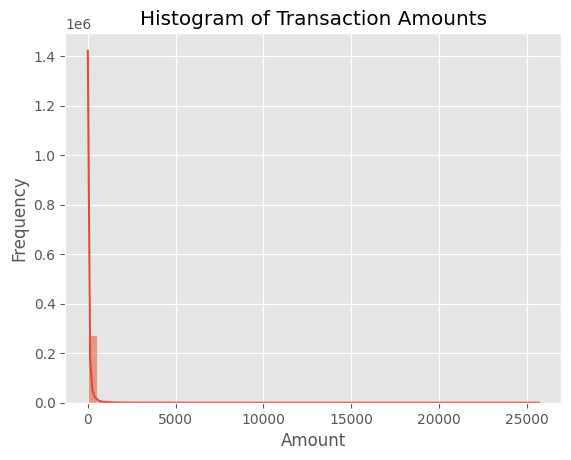

In [13]:
# Histogram of Amount to Understand the distribution of transaction amounts.
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

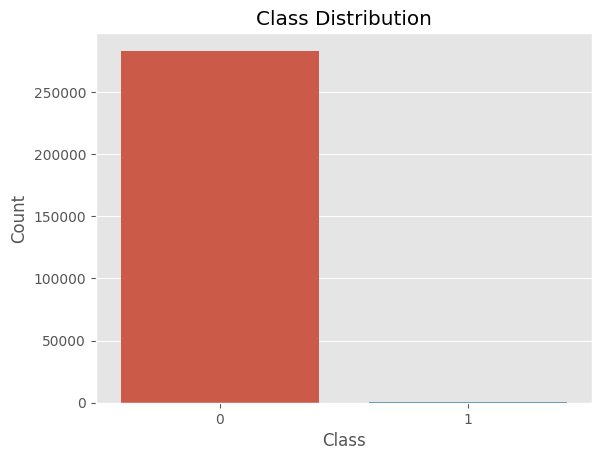

In [14]:
# Visualize the proportion of fraudulent and non-fraudulent transactions.
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

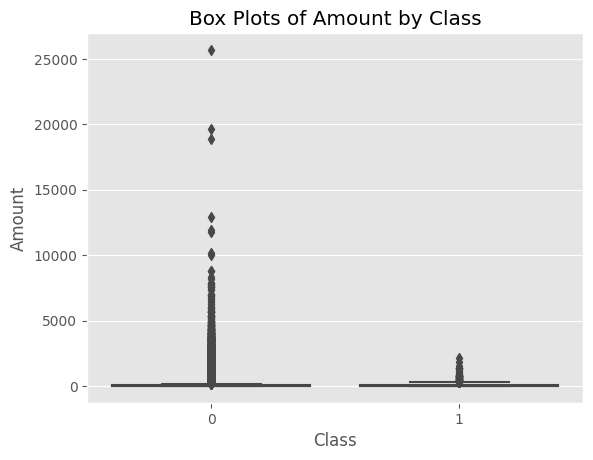

In [15]:
# Compare the distribution of transaction amounts for fraudulent and non-fraudulent transactions.
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Box Plots of Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

### 4) Class Imbalance

In [16]:
fraud_count = data['Class'].value_counts()[1]
non_fraud_count = data['Class'].value_counts()[0]

print("Number of fraudulent transactions:", fraud_count)
print("Number of non-fraudulent transactions:", non_fraud_count)

Number of fraudulent transactions: 473
Number of non-fraudulent transactions: 283253


In [17]:
imbalance_ratio = non_fraud_count / fraud_count
print("Class imbalance ratio:", imbalance_ratio)

Class imbalance ratio: 598.8435517970402


## 3) Feature Engineering

### 1) feature scaling 

<Axes: ylabel='Density'>

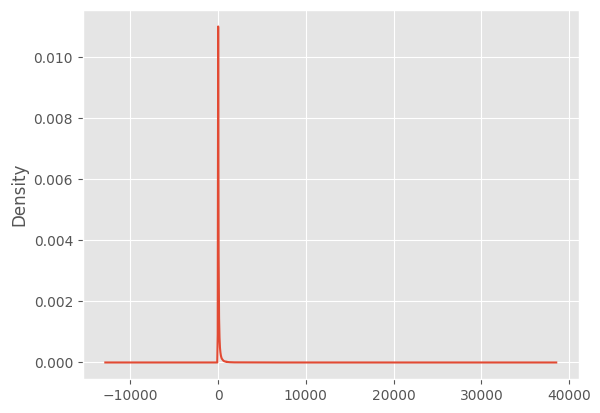

In [18]:
data['Amount'].plot.kde()

In [19]:
# As we saw earlier, the Amount is not in the same range as the data

# we will use Standered scaler to fix range of values in Amount columns
Scaler = StandardScaler()
data['Amount'] = Scaler.fit_transform(pd.DataFrame(data['Amount']))

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


> **column Time not necessary**

In [20]:
data.drop('Time', axis=1, inplace=True)

# 4) spliting data 


In [21]:
X = data.drop('Class', axis=1)
y = data['Class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(226980, 29)
(56746, 29)
(226980,)
(56746,)


# 5)Model Selection

In [23]:
# make all algorithms as a dict to loop in all Classifer
Classifier = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, clf in Classifier.items() :
  print (f'============= {name} ==================')
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'Accuracy = {accuracy_score(y_test, y_pred)}\n')
  print(f'precision_score = {precision_score(y_test, y_pred)}\n')
  print(f'recall_score = {recall_score(y_test, y_pred)}\n')
  print(f'f1_score = {f1_score(y_test, y_pred)}\n')
  print(f'confusion_matrix = {confusion_matrix(y_test, y_pred)}\n')

============= Logistic Regression ==================
Accuracy = 0.9991717477883904

precision_score = 0.8909090909090909

recall_score = 0.5444444444444444

f1_score = 0.6758620689655171

confusion_matrix = [[56650     6]
 [   41    49]]

============= Decision Tree ==================
Accuracy = 0.999048391076023

precision_score = 0.6956521739130435

recall_score = 0.7111111111111111

f1_score = 0.7032967032967032

confusion_matrix = [[56628    28]
 [   26    64]]

============= Random Forest ==================
Accuracy = 0.9995241955380115

precision_score = 0.9701492537313433

recall_score = 0.7222222222222222

f1_score = 0.8280254777070063

confusion_matrix = [[56654     2]
 [   25    65]]



> **As you can see, the accuracy of the model is not the best, due to the presence of an imbalance in the data**

# 6) Handling Imbalanced Data 

([<matplotlib.patches.Wedge at 0x7f0cadea1cc0>,
 [Text(-1.0999849139505065, 0.005760996554156921, 'Legit'),
  Text(1.099984914296047, -0.005760930577456522, 'Fraud')])

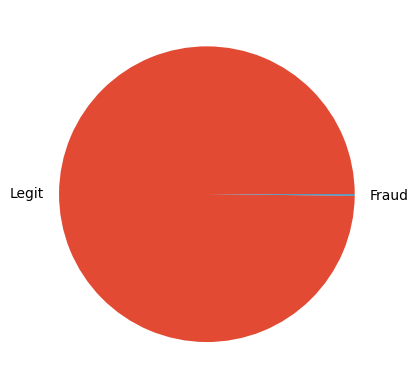

In [24]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

plt.pie(data['Class'].value_counts(), labels=['Legit', 'Fraud'])

In [25]:
print(f'Legit >> {legit.shape}')
print(f'Fraud >> {fraud.shape}')

Legit >> (283253, 30)
Fraud >> (473, 30)


## 1) Undersampling the Majority Class

In [26]:
# we get a sample from data to make data balanced 
new_data = pd.concat([legit.sample(n=473), fraud], ignore_index = True)

In [27]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

> spliting data again depond on new version of data 

In [28]:
X_undersample = new_data.drop('Class', axis=1)
y_undersample = new_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(756, 29)
(190, 29)
(756,)
(190,)


> choose model 

In [29]:
Classifier = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, clf in Classifier.items() :
  print (f'============= {name} ==================')
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'Accuracy = {accuracy_score(y_test, y_pred)}\n')
  print(f'precision_score = {precision_score(y_test, y_pred)}\n')
  print(f'recall_score = {recall_score(y_test, y_pred)}\n')
  print(f'f1_score = {f1_score(y_test, y_pred)}\n')
  print(f'confusion_matrix = {confusion_matrix(y_test, y_pred)}\n')

============= Logistic Regression ==================
Accuracy = 0.9473684210526315

precision_score = 0.9791666666666666

recall_score = 0.9215686274509803

f1_score = 0.9494949494949494

confusion_matrix = [[86  2]
 [ 8 94]]

============= Decision Tree ==================
Accuracy = 0.9263157894736842

precision_score = 0.9489795918367347

recall_score = 0.9117647058823529

f1_score = 0.9300000000000002

confusion_matrix = [[83  5]
 [ 9 93]]

============= Random Forest ==================
Accuracy = 0.9368421052631579

precision_score = 0.96875

recall_score = 0.9117647058823529

f1_score = 0.9393939393939394

confusion_matrix = [[85  3]
 [ 9 93]]



## 2) Oversampling the Minority Class

In [30]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [31]:
y_sm.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

> splinting data with update

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(453204, 29)
(113302, 29)
(453204,)
(113302,)


> choose model with update

In [33]:
Classifier = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, clf in Classifier.items() :
  print (f'============= {name} ==================')
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'Accuracy = {accuracy_score(y_test, y_pred)}\n')
  print(f'precision_score = {precision_score(y_test, y_pred)}\n')
  print(f'recall_score = {recall_score(y_test, y_pred)}\n')
  print(f'f1_score = {f1_score(y_test, y_pred)}\n')
  print(f'confusion_matrix = {confusion_matrix(y_test, y_pred)}\n')

============= Logistic Regression ==================
Accuracy = 0.9434961430513142

precision_score = 0.9722830870648164

recall_score = 0.9134045285807281

f1_score = 0.9419245981349106

confusion_matrix = [[54983  1480]
 [ 4922 51917]]

============= Decision Tree ==================
Accuracy = 0.9983230657887769

precision_score = 0.9975058401981276

recall_score = 0.999155509421348

f1_score = 0.9983299933199732

confusion_matrix = [[56321   142]
 [   48 56791]]

============= Random Forest ==================
Accuracy = 0.9999029143351397

precision_score = 0.999806508355321

recall_score = 1.0

f1_score = 0.9999032448170009

confusion_matrix = [[56452    11]
 [    0 56839]]



> **The Random Forest model is the best in terms of performance:**
> 
> It has the highest accuracy (99.99%).

> Perfect recall (1.0) meaning no true positives are missed.

> Precision and F1-score are also nearly perfect.

# 7) Deploying the Model

In [34]:
RandomForestModel = RandomForestClassifier()
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
joblib.dump(RandomForestModel, 'CerditCardRandomForestModel.pkl')


['CerditCardRandomForestModel.pkl']

In [36]:
# get example from data to test on it our model
print (list(data.iloc[540])) # iloc to get row using index location

[-0.960818700152674, 0.0710130174771463, 2.60281933663759, -0.99869306098515, -0.383880011575843, -0.208286115073412, 0.368938158535082, 0.0595136407483677, 0.504836275517028, -0.678021319743396, 1.05047512024654, 1.31612484967149, 0.377964606253002, -0.861676968779237, -1.75580529833207, 0.097838076187801, -0.4651699009842, -0.224919085009194, -0.0197062093199049, 0.315315447416209, -0.13682682244554, -0.0813335069826737, -0.016162266594744, 0.605342437117432, -0.12175945402901, 0.736684428025349, 0.0771085656054282, -0.069752043247462, -0.12932434973089274, 0.0]


In [37]:
# load model when put it in app as this :
FinalModel = joblib.load('CerditCardRandomForestModel.pkl')

Modelpredtest = FinalModel.predict([[-0.960818700152674, 0.0710130174771463, 2.60281933663759, -0.99869306098515, -0.383880011575843, -0.208286115073412, 0.368938158535082, 0.0595136407483677, 0.504836275517028, -0.678021319743396, 1.05047512024654, 1.31612484967149, 0.377964606253002, -0.861676968779237, -1.75580529833207, 0.097838076187801, -0.4651699009842, -0.224919085009194, -0.0197062093199049, 0.315315447416209, -0.13682682244554, -0.0813335069826737, -0.016162266594744, 0.605342437117432, -0.12175945402901, 0.736684428025349, 0.0771085656054282, -0.069752043247462, -0.12932434973089274]])

if Modelpredtest[0] == 1 :
    print("\n This is fraudulent transactions\n")
else :
    print("\nThis is  non-fraudulent transactions\n")


This is  non-fraudulent transactions



# In this project, we successfully developed a credit card fraud detection system using machine learning techniques.

## Conclusion for the Project:

In this project, we aimed to evaluate the performance of multiple machine learning models to identify the best classifier for a given dataset. 
Three models were trained and tested: Logistic Regression, Decision Tree, and Random Forest, with their performances measured using key metrics such as 
accuracy, precision, recall, and F1-score.

Through a detailed analysis of the results:

Logistic Regression provided solid performance, but it was outperformed by the more complex models, particularly in recall, where it missed more positive cases.

The Decision Tree model significantly improved over logistic regression, achieving high accuracy and precision, and reducing both false positives and false negatives.

Random Forest emerged as the best model, exhibiting near-perfect scores across all metrics. Its accuracy of 99.99% and perfect recall (1.0) made it  highly reliable for detecting all positive cases with minimal false positives.

Given the results, Random Forest was chosen as the final model for deployment due to its ability to balance both precision and recall, ensuring high  performance in real-world scenarios.


## Key Outcomes:
High Accuracy: The Random Forest model achieved outstanding accuracy, minimizing errors and making reliable predictions.
Strong Precision and Recall: It identified true positives without sacrificing precision, resulting in an F1-score close to perfection.
Real-world Application: The chosen model is suitable for deployment in environments where minimizing false positives and negatives is critical, such as medical diagnosis, fraud detection, or other high-stakes classifications.

The final deployment using the Random Forest model ensures that the system can handle real-time data input and provide robust, reliable predictions.

# If you have any specific questions or need help with something, feel free to ask. Whether it’s about Python programming, data science, machine learning, or anything else, I’m here to help. 😊
## [Linkedin](https://www.linkedin.com/in/muhammad-ruby-muhammad)
## [github](https://github.com/MuhammadRuby)
## [Mail](mohamedroby831@gmail.com)